In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [ ]:
#setup random variables, weights    
#N, M - boundary sizes, 
#L - last passage percolation time
#weights - expoential
#lmbda - rate parameter
N, M = 10**3, 10**3
L = np.zeros((M + 1, N + 1))
weights = np.zeros((M + 1, N + 1))
lmbda = 1

In [ ]:
#simulate weights, calculate last passage percolation time

for x in range(M+1):
  for y in range(N + 1): 
    #quantile function of erv
    weights[x][y] = -1/lmbda * np.log(np.random.uniform(0, 1))
  
for x in range(1,M+1):
  L[x][0] = L[x-1][0] + weights[x][0]
  
for y in range(1,N+1):
  L[0][y] = L[0][y-1] + weights[0][y]
  
for x in range(1,M+1):
  for y in range(1,N+1):
    L[x][y] = weights[x][y] + max(L[x][y-1], L[x-1][y])

In [ ]:
#graphs the places reached in a particular time
times = [500]
xInfected = np.zeros(0)
yInfected = np.zeros(0)
xVals = np.linspace(0, M, M+1)
yMax = np.zeros(M+1)
for time in times:
  for x in range(M+1):
    for y in range(N+1):
      if L[x][y] < time:
        xInfected = np.append(xInfected,x)
        yInfected = np.append(yInfected,y)
        yMax[x] = max(yMax[x], y)
  plt.plot(xInfected, yInfected)

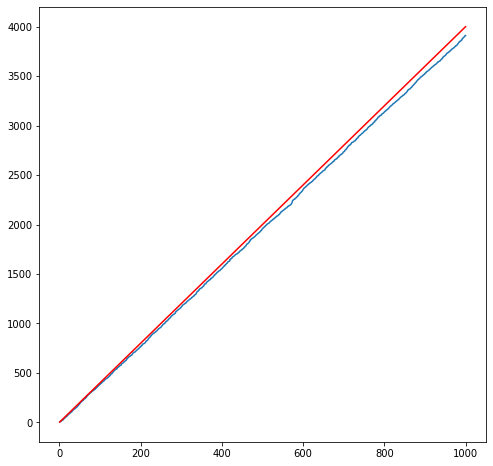

In [ ]:
#shows last passage percolation time is ~4N
#yvalues[i] is last passage percolation time to reach (i, i)
#red line 4N, blue line LLP times

start = 1

xvalues = np.linspace(start, N, N - start + 1)
yvalues = np.zeros(N - start + 1)
for x in xvalues:
	yvalues[int(x - start)] = L[int(x)][int(x)]
  

plt.figure(figsize=(8,8))
plt.plot(xvalues, yvalues)

yLine = 4 * xvalues
plt.plot(xvalues, yLine, color = 'r')
plt.show()

In [ ]:
yvalues2 = (yvalues - 4 * xvalues) / (xvalues ** (1/3))
yCurve = xvalues ** (1/3)
plt.plot(xvalues, yvalues2)
